# Evaluation for classification

<h3>Preamble

In [2]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

datasets = load_digits()
X, y = datasets.data, datasets.target

for class_name, class_count in zip(datasets.target_names, np.bincount(datasets.target)):
    print(class_name, class_count)

0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180


In [3]:
y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0

print('original labels:\t', y[1:30])
print('new binary labels:\t', y_binary_imbalanced[1:30])

original labels:	 [1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
new binary labels:	 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [4]:
np.bincount(y_binary_imbalanced)

array([1615,  182])

In [5]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced,
                                                   random_state = 0)
svm = SVC(kernel = 'rbf', C = 1).fit(X_train, y_train)
svm.score(X_test, y_test)

/Users/ritik/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9088888888888889

<h3>Dummy classifier

In [8]:
from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)

y_dummy_prediction = dummy_majority.predict(X_test)

y_dummy_prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [9]:
dummy_majority.score(X_test, y_test)

0.9044444444444445

In [10]:
svm = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.9777777777777777

<h3>Confusion Matrices

<h4>binary (two-class) confusion matrix

In [11]:
from sklearn.metrics import confusion_matrix

dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)

y_majority_predicted = dummy_majority.predict(X_test)
confusion = confusion_matrix(y_test, y_majority_predicted)

print('Most frequent class (dummy classifier)\n', confusion)

Most frequent class (dummy classifier)
 [[407   0]
 [ 43   0]]


In [12]:
dummy_classprop = DummyClassifier(strategy = 'stratified').fit(X_train, y_train)

y_classprop_predicted = dummy_classprop.predict(X_test)
confusion = confusion_matrix(y_test, y_classprop_predicted)

print('Random class-proportional prediction (dummy classifier)\n',
     confusion)

Random class-proportional prediction (dummy classifier)
 [[367  40]
 [ 41   2]]


In [13]:
svm = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)
confusion = confusion_matrix(y_test, svm_predicted)

In [14]:
print('Support vector machine classifier (linear kernel, C = 1)\n',
     confusion)

Support vector machine classifier (linear kernel, C = 1)
 [[402   5]
 [  5  38]]


In [15]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, y_train)
lr_predicted = lr.predict(X_test)
confusion = confusion_matrix(y_test, lr_predicted)

print('Logistic regression classifier (default settings)\n', confusion)

Logistic regression classifier (default settings)
 [[401   6]
 [  6  37]]


/Users/ritik/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [18]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
tree_predicted = dt.predict(X_test)
confusion = confusion_matrix(y_test, tree_predicted)

print('Decision tree classifier (max_depth = 2)\n', confusion)

Decision tree classifier (max_depth = 2)
 [[400   7]
 [ 17  26]]


<h3>Evaluation metrics for binary classification

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuarcy: {:.2f}'.format(accuracy_score(y_test, tree_predicted)))
print('Precision: {:.2f}'.format(precision_score(y_test, tree_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test, tree_predicted)))
print('F1: {:.2f}'.format(f1_score(y_test, tree_predicted)))

Accuarcy: 0.95
Precision: 0.79
Recall: 0.60
F1: 0.68


In [22]:
# Combined report with all above metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, tree_predicted, target_names = ['not 1', '1']))

              precision    recall  f1-score   support

       not 1       0.96      0.98      0.97       407
           1       0.79      0.60      0.68        43

   micro avg       0.95      0.95      0.95       450
   macro avg       0.87      0.79      0.83       450
weighted avg       0.94      0.95      0.94       450



In [23]:
print('Random class-proportional (dummy)\n', 
      classification_report(y_test, y_classprop_predicted, target_names=['not 1', '1']))
print('SVM\n', 
      classification_report(y_test, svm_predicted, target_names = ['not 1', '1']))
print('Logistic regression\n', 
      classification_report(y_test, lr_predicted, target_names = ['not 1', '1']))
print('Decision tree\n', 
      classification_report(y_test, tree_predicted, target_names = ['not 1', '1']))

Random class-proportional (dummy)
               precision    recall  f1-score   support

       not 1       0.90      0.90      0.90       407
           1       0.05      0.05      0.05        43

   micro avg       0.82      0.82      0.82       450
   macro avg       0.47      0.47      0.47       450
weighted avg       0.82      0.82      0.82       450

SVM
               precision    recall  f1-score   support

       not 1       0.99      0.99      0.99       407
           1       0.88      0.88      0.88        43

   micro avg       0.98      0.98      0.98       450
   macro avg       0.94      0.94      0.94       450
weighted avg       0.98      0.98      0.98       450

Logistic regression
               precision    recall  f1-score   support

       not 1       0.99      0.99      0.99       407
           1       0.86      0.86      0.86        43

   micro avg       0.97      0.97      0.97       450
   macro avg       0.92      0.92      0.92       450
weighted avg 

<h3>Decision functions

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test)
y_score_list = list(zip(y_test[0:20], y_scores_lr[0:20]))

# show the decision_function scores for first 20 instances
y_score_list

/Users/ritik/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[(0, -23.17711236290324),
 (0, -13.541470729541413),
 (0, -21.72290098969473),
 (0, -18.907438437430027),
 (0, -19.73582172900229),
 (0, -9.749807819560061),
 (1, 5.2349604859009276),
 (0, -19.307551661127864),
 (0, -25.101182889530396),
 (0, -21.82736239135058),
 (0, -24.151343401889438),
 (0, -19.576969790071697),
 (0, -22.574689400560423),
 (0, -10.823324268750714),
 (0, -11.912123406737392),
 (0, -10.97922371337485),
 (1, 11.206006114721543),
 (0, -27.64600231793191),
 (0, -12.859381428186682),
 (0, -25.848764845244997)]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, 
                                                   random_state = 0)
y_proba_lr = lr.fit(X_train, y_train).predict_proba(X_test)
y_proba_list = list(zip(y_test[0:20], y_proba_lr[0:20, 1]))

# show the probability of positive class for first 20 instances
y_proba_list

/Users/ritik/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[(0, 8.59622935435435e-11),
 (0, 1.3152654562877047e-06),
 (0, 3.680136853269112e-10),
 (0, 6.146159365768372e-09),
 (0, 2.684364743208678e-09),
 (0, 5.8302468525539246e-05),
 (1, 0.9947011919630767),
 (0, 4.119427394145904e-09),
 (0, 1.2551475474865303e-11),
 (0, 3.3151024835512065e-10),
 (0, 3.244926244767743e-11),
 (0, 3.1465167386169614e-09),
 (0, 1.5701348842784633e-10),
 (0, 1.9928808739415592e-05),
 (0, 6.7085339693943354e-06),
 (0, 1.7052039108840334e-05),
 (1, 0.9999864078713285),
 (0, 9.851304579070747e-13),
 (0, 2.6015997081086803e-06),
 (0, 5.943250884839227e-12)]

<h3> Precision recall curves

<IPython.core.display.Javascript object>


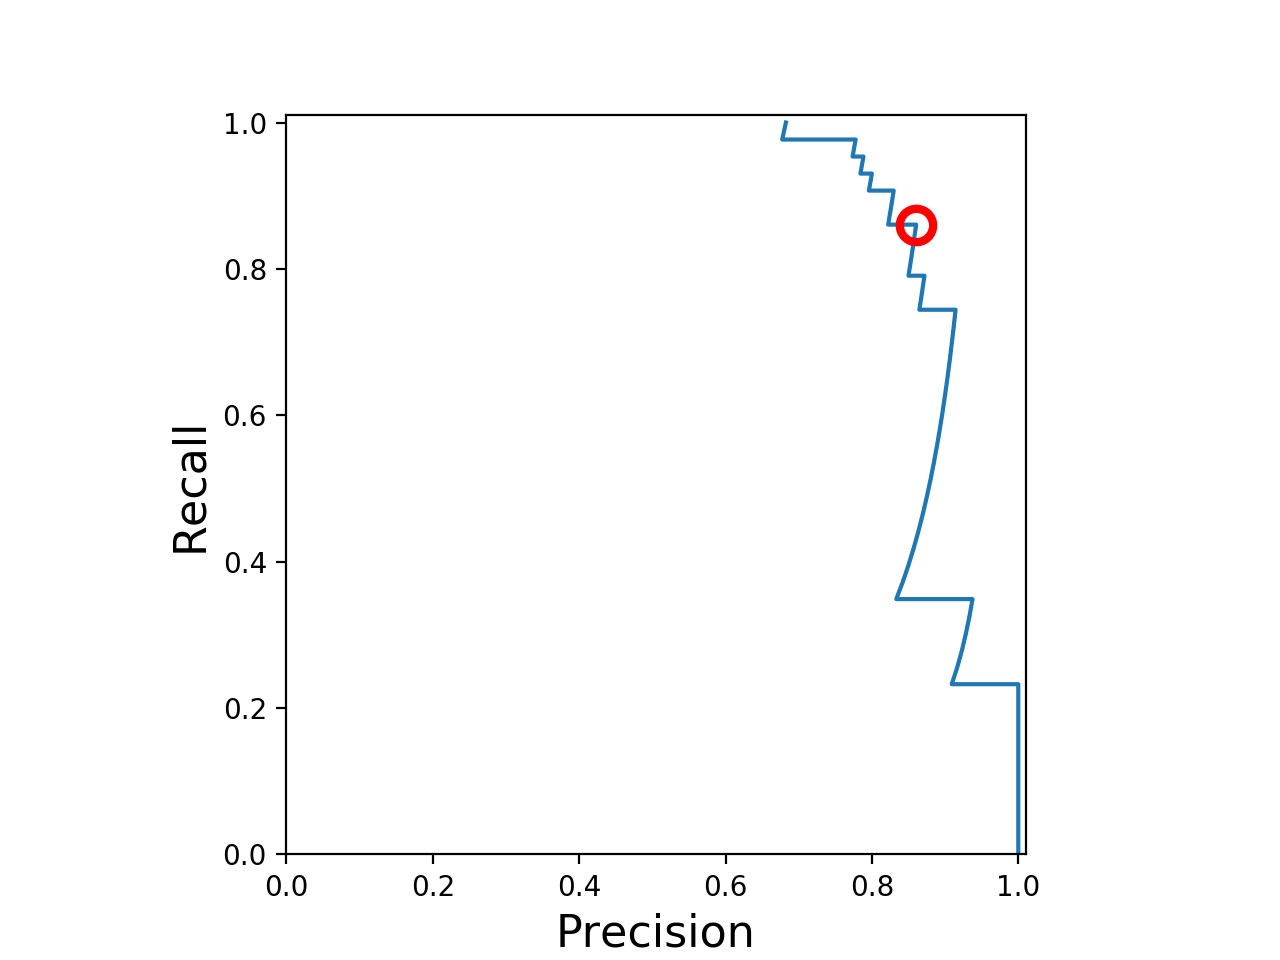

20
[-4.04803574 -3.93667242 -3.48717485 -3.44800195 -3.34287934 -2.57445087
 -2.3764742  -2.34828463 -2.30140515 -2.15840359 -2.03778005 -1.87217553
 -1.75310972 -1.72748008 -1.68509808 -1.48134611 -1.34026094 -1.30319866
 -1.08198757 -0.56678032  0.13115969  0.17428891  0.47495697  0.63936383
  1.0051027   1.33622205  1.68340892  1.69829293  1.88008137  2.19069822
  2.43522556  2.55294412  3.72030411  3.8071421   4.21200121  4.25136891
  4.3063296   4.31521932  4.55491196  4.57010095  4.93274183  5.23496049
  5.73362239  6.12956752  6.55481526  6.87018495  6.93001183  7.21946762
  7.37421383  7.81049381  8.26283234  8.39750203  8.4575643   9.84762367
  9.87275882 10.20082651 11.20600611 11.48231118 11.55003535 11.68156736
 13.25905795 14.73777148 16.02846252]


/Users/ritik/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


In [39]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label = 'Precision-recall curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none',
        c = 'r', mew = 3)
plt.xlabel('Precision', fontsize = 16)
plt.ylabel('Recall', fontsize = 16)
plt.axes().set_aspect('equal')
plt.show()
print(closest_zero)
print(thresholds)


<h3>ROC curves, Area-Under-Curve(AUC)

/Users/ritik/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<IPython.core.display.Javascript object>


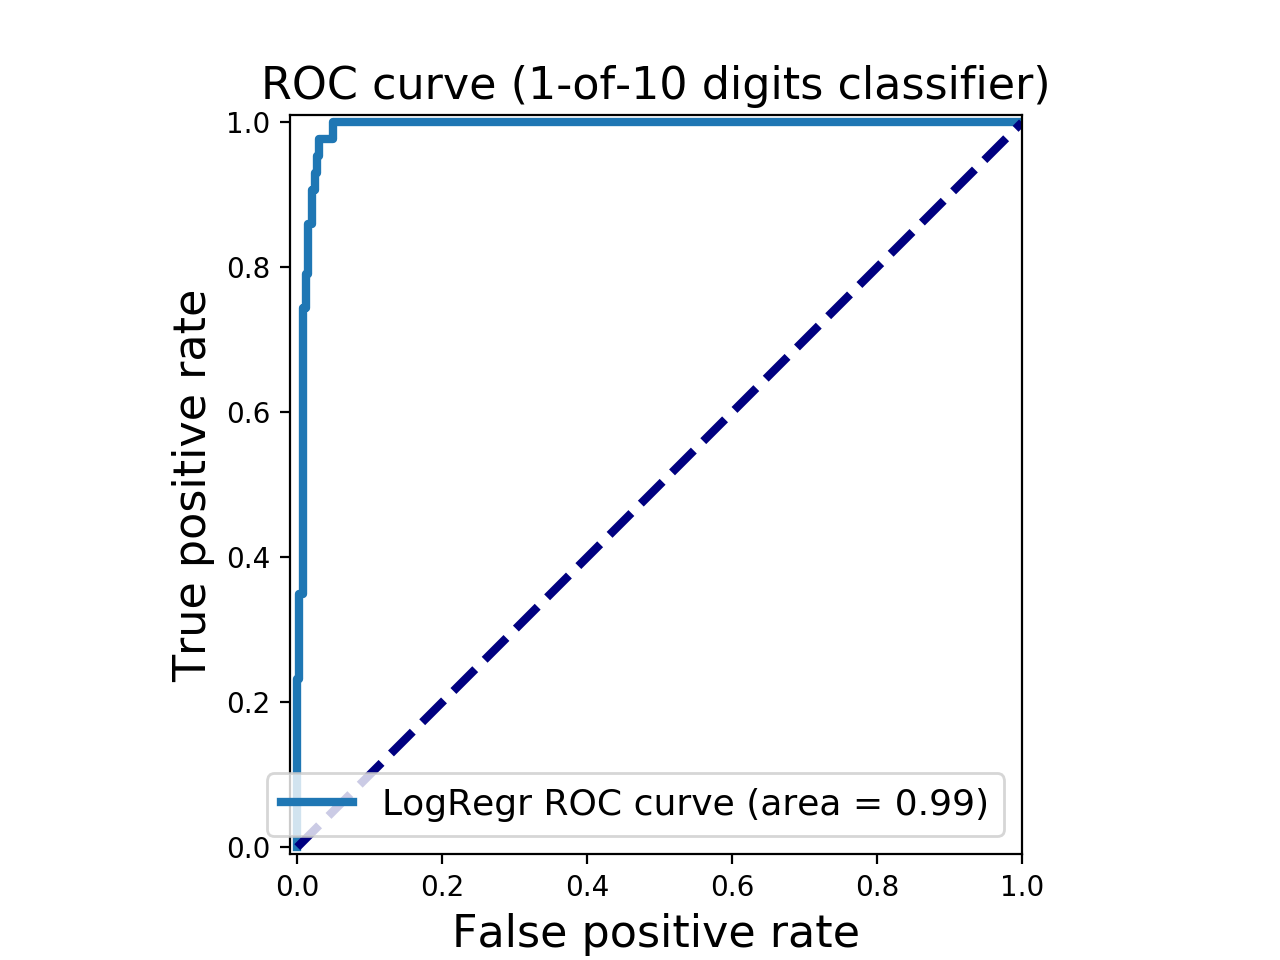

[ 17.02846252  16.02846252   9.84762367   8.4575643    7.21946762
   6.87018495   1.88008137   1.68340892   1.0051027    0.63936383
   0.13115969  -1.08198757  -1.34026094  -1.68509808  -1.72748008
  -1.75310972  -1.87217553  -2.03778005  -2.15840359  -3.93667242
  -4.04803574 -43.20820599]


/Users/ritik/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


In [40]:
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state = 0)

y_score_lr = lr.fit(X_train, y_train).decision_function(X_test)
fpr_lr, tpr_lr, thresholds = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw = 3, label = 'LogRegr ROC curve (area = {:.2f})'.format(roc_auc_lr))
plt.xlabel('False positive rate', fontsize = 16)
plt.ylabel('True positive rate', fontsize = 16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 13)
plt.plot([0,1], [0,1], color = 'navy', lw = 3, linestyle = '--')
plt.axes().set_aspect('equal')
plt.show()
print(thresholds)



<IPython.core.display.Javascript object>


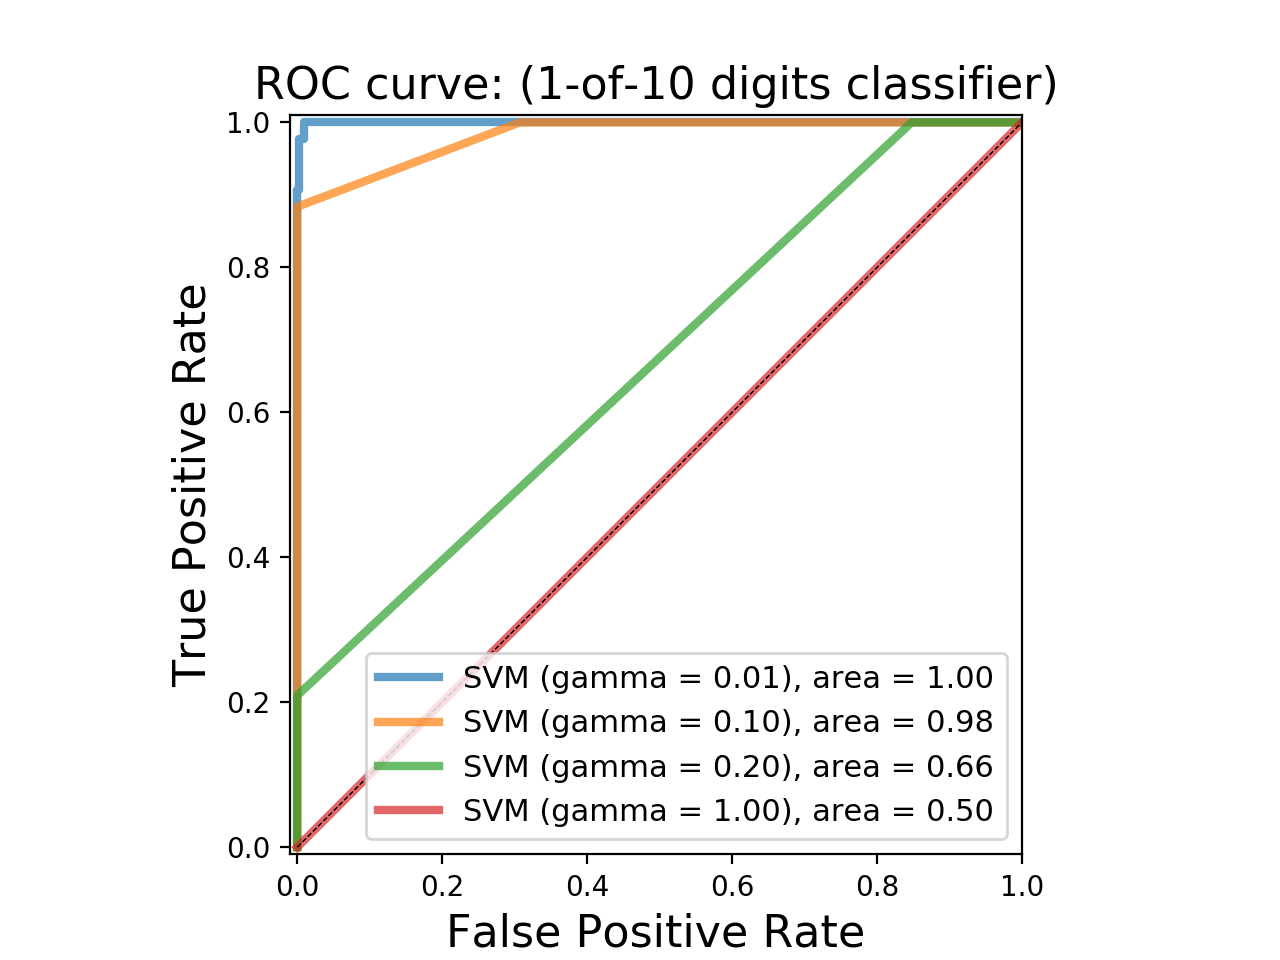

gamma = 0.01  accuarcy = 0.91  AUC = 1.00
gamma = 0.10  accuarcy = 0.90  AUC = 0.98
gamma = 0.20  accuarcy = 0.90  AUC = 0.66
gamma = 1.00  accuarcy = 0.90  AUC = 0.50


/Users/ritik/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


In [41]:
from matplotlib import cm

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state = 0)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
for g in [0.01, 0.1, 0.20, 1]:
    svm = SVC(gamma = g).fit(X_train, y_train)
    y_score_svm = svm.decision_function(X_test)
    fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    accuracy_svm = svm.score(X_test, y_test)
    print('gamma = {:.2f}  accuarcy = {:.2f}  AUC = {:.2f}'.format(g, accuracy_svm, 
                                                                  roc_auc_svm))
    plt.plot(fpr_svm, tpr_svm, lw = 3, alpha = 0.7,
            label = 'SVM (gamma = {:.2f}), area = {:.2f}'.format(g, roc_auc_svm))
    
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.plot([0,1], [0,1], color = 'k', lw = 0.5, linestyle = '--')
plt.legend(loc = 'lower right', fontsize = 11)
plt.title('ROC curve: (1-of-10 digits classifier)', fontsize = 16)
plt.axes().set_aspect('equal')

plt.show()